<a href="https://colab.research.google.com/github/Pragna235/Regression-Models/blob/main/Copy_of_Age_NetWorth_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Slope [[6.30945055]]
Intercept [-7.44716216]

Training data 0.877314608488221
Testing data 0.7889037259170788



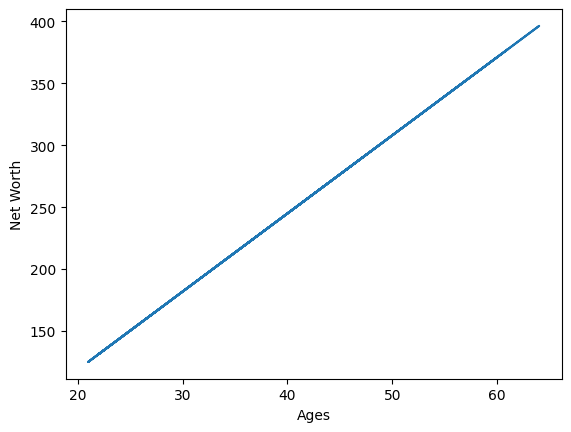

In [5]:
import numpy
import random

import matplotlib.pyplot as plt

#Function named studentReg for using linear regression model and training the model
#with given values
def studentReg(ages_train, net_worths_train):
  from sklearn.linear_model import LinearRegression
  reg = LinearRegression()
  reg.fit(ages_train, net_worths_train)
  return reg

#random() function is used to generate random numbers in Python
#Seed is used in the generation of a pseudo-random encryption key.
#Also seed function is used to generate same random numbers again and again and 
#simplifies algorithm testing process.
random.seed(42)
numpy.random.seed(42)

ages = []
for ii in range(100):
  ages.append( random.randint(20,65) )

#scale : [float or array_like]Standard Derivation of the distribution. 
#Generating net_worth by multiplying with 6.25 taking it as slope
net_worths = [ii * 6.25 + numpy.random.normal(scale=40.) for ii in ages] #y=mx+c

### need massage list into a 2d numpy array to get it to work in LinearRegression
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

#train_test_split is a function in Sklearn model selection for splitting data 
#arrays into two subsets: for training data and for testing data. 
#With this function, you don't need to divide the dataset manually.
from sklearn.model_selection import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths)

#Passing training data to my Linear regression model
reg = studentReg(ages_train, net_worths_train)

#Checking slope and intercept of the trained model
print("Slope",reg.coef_) #m
print("Intercept",reg.intercept_) #c
print()

#Calculating efficiency. It internally calculates y_pred again and gives the 
#efficiency
print("Training data",reg.score(ages_train, net_worths_train))
print("Testing data",reg.score(ages_test, net_worths_test))
print()

#Plotting graph using matplotlib.
plt.plot(ages_test,reg.predict(ages_test))
plt.xlabel("Ages")
plt.ylabel("Net Worth")
plt.show()


Text(0.5, 1.0, 'Linear Regression Plot for Training Data')

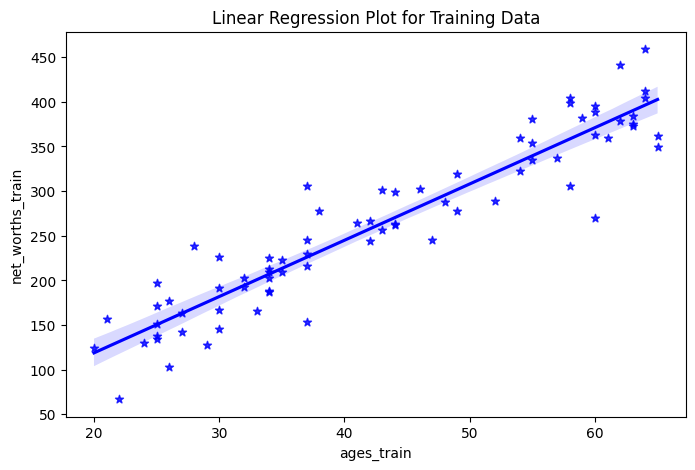

In [10]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.regplot(x=ages_train,y=net_worths_train,scatter = True, color = 'b',marker = "*")
plt.xlabel("ages_train")
plt.ylabel("net_worths_train")
plt.title("Linear Regression Plot for Training Data")


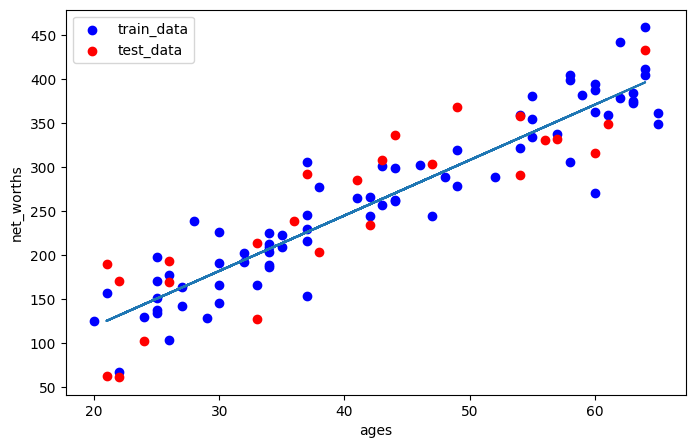

In [12]:
plt.figure(figsize = (8,5))
plt.scatter(ages_train,net_worths_train,color='b',label = 'train_data')
plt.scatter(ages_test,net_worths_test,color='r',label='test_data')
plt.plot(ages_test,reg.predict(ages_test))
plt.xlabel("ages")
plt.ylabel("net_worths")
plt.legend(loc=2) #location
plt.show()